## Kalman filter code(1)

lat 0.0004747012607458324
lon 0.00020002942454655715
m_lat 0.0004669126162012036
m_lon 0.00019688639292535597


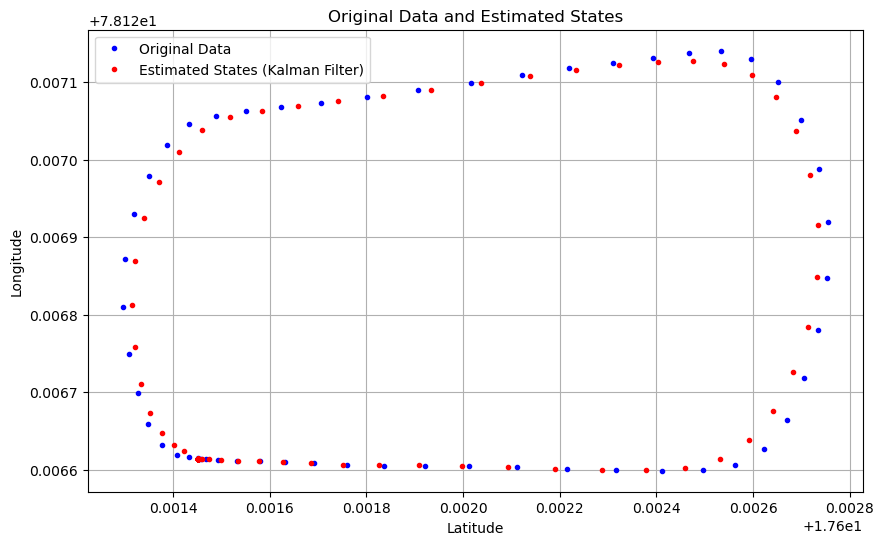

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

def KalmanFilter(y, P, x, u, A, B, H, Q, R):
    Ht = np.transpose(H)
    At = np.transpose(A)
    yhat = A.dot(y) + B.dot(u)
    Phat = A.dot(P).dot(At) + Q
    K = Phat.dot(Ht).dot(np.linalg.inv(H.dot(Phat).dot(Ht) + R))
    ynew = yhat + K.dot(x - H.dot(yhat))
    Pnew = (np.eye(K.shape[0]) - K.dot(H)).dot(Phat)
    return ynew, Pnew

# Read the ASCII file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()
         
# Initialize lists to store parsed data
latitudes = []
longitudes = []
std_latitudes = []
std_longitudes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extract latitude, longitude, and their standard deviations
    latitudes.append(float(fields[2]))
    longitudes.append(float(fields[3]))
    std_latitudes.append(float(fields[7]))
    std_longitudes.append(float(fields[8]))
print("lat",np.std(latitudes))
print("lon",np.std(longitudes))
# Convert lists to numpy arrays
latitudes = np.array(latitudes)
longitudes = np.array(longitudes)
std_latitudes = np.array(std_latitudes)
std_longitudes = np.array(std_longitudes)

# Define Kalman Filter parameters
A = np.eye(2)  # State transition matrix
B = np.zeros((2, 2))  # Control input matrix (assuming no control input)
H = np.eye(2)  # Observation matrix
Q = np.eye(2) * 0.00001  # Process noise covariance matrix

# Construct measurement noise covariance matrix R
R_lat = np.diag(std_latitudes ** 2)  # Measurement noise covariance matrix for latitude
R_lon = np.diag(std_longitudes ** 2)  # Measurement noise covariance matrix for longitude
# Adjust the construction of R to match the dimensions of H.dot(Phat).dot(Ht)
R = block_diag(R_lat, R_lon)[:2, :2]

# Initialize state and covariance matrices
y = np.array([latitudes[0], longitudes[0]])  # Initial state estimate
P = np.eye(2)  # Initial state covariance

# Apply Kalman Filter to estimate states
estimated_states = np.zeros((len(latitudes), 2))
for i in range(len(latitudes)):
    x = np.array([latitudes[i], longitudes[i]])  # Measurement vector
    y, P = KalmanFilter(y, P, x, np.zeros(2), A, B, H, Q, R)  # Apply Kalman Filter
    estimated_states[i, :] = y  # Store estimated state
mod_lat=estimated_states[:,0]
mod_lon=estimated_states[:,1]
print("m_lat",np.std(mod_lat))
print("m_lon",np.std(mod_lon))
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes,'b.', label='Original Data')
plt.plot(estimated_states[:, 0], estimated_states[:, 1],'r.', label='Estimated States (Kalman Filter)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original Data and Estimated States')
plt.legend()
plt.grid(True)
plt.show()


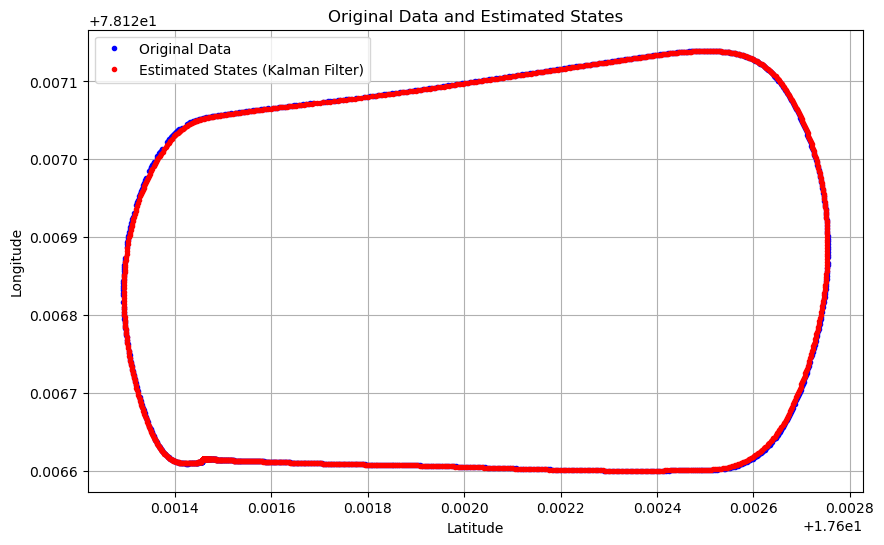

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

def KalmanFilter(y, P, x, u, A, B, H, Q, R):
    Ht = np.transpose(H)
    At = np.transpose(A)
    yhat = A.dot(y) + B.dot(u)
    Phat = A.dot(P).dot(At) + Q
    K = Phat.dot(Ht).dot(np.linalg.inv(H.dot(Phat).dot(Ht) + R))
    ynew = yhat + K.dot(x - H.dot(yhat))
    Pnew = (np.eye(K.shape[0]) - K.dot(H)).dot(Phat)
    return ynew, Pnew

# Read the ASCII file
file_path = "/Users/ravitejakunchanapalli/Downloads/mod_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
std_latitudes = []
std_longitudes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extract latitude, longitude, and their standard deviations
    latitudes.append(float(fields[2]))
    longitudes.append(float(fields[3]))
    std_latitudes.append(float(fields[7]))
    std_longitudes.append(float(fields[8]))

# Convert lists to numpy arrays
latitudes = np.array(latitudes)
longitudes = np.array(longitudes)
std_latitudes = np.array(std_latitudes)
std_longitudes = np.array(std_longitudes)

# Define Kalman Filter parameters
A = np.eye(2)  # State transition matrix
B = np.zeros((2, 2))  # Control input matrix (assuming no control input)
H = np.eye(2)  # Observation matrix
Q = np.eye(2) * 0.000001  # Process noise covariance matrix

# Construct measurement noise covariance matrix R
R_lat = np.diag(std_latitudes ** 2)  # Measurement noise covariance matrix for latitude
R_lon = np.diag(std_longitudes ** 2)  # Measurement noise covariance matrix for longitude
# Adjust the construction of R to match the dimensions of H.dot(Phat).dot(Ht)
R = block_diag(R_lat, R_lon)[:2, :2]

# Initialize state and covariance matrices
y = np.array([latitudes[0], longitudes[0]])  # Initial state estimate
P = np.eye(2)  # Initial state covariance

# Apply Kalman Filter to estimate states
estimated_states = np.zeros((len(latitudes), 2))
for i in range(len(latitudes)):
    x = np.array([latitudes[i], longitudes[i]])  # Measurement vector
    y, P = KalmanFilter(y, P, x, np.zeros(2), A, B, H, Q, R)  # Apply Kalman Filter
    estimated_states[i, :] = y  # Store estimated state

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(latitudes,longitudes, 'b.', label='Original Data')
plt.plot(estimated_states[:, 0], estimated_states[:, 1],'r.', label='Estimated States (Kalman Filter)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original Data and Estimated States')
plt.legend()
plt.grid(True)
plt.show()


## Sir pdf approach(Kalman filter(final))
Roughly speaking you can think of  R as the amount of noise in the sensors, while  Q is the amount of uncertainty in the system model.

/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_3158/2500771868.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(original_latitudes,original_longitudes,  'b.', label='Original Data', color='blue')
/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_3158/2500771868.py:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot( estimated_latitudes,estimated_longitudes,'r.',label='Estimated Data', color='red')


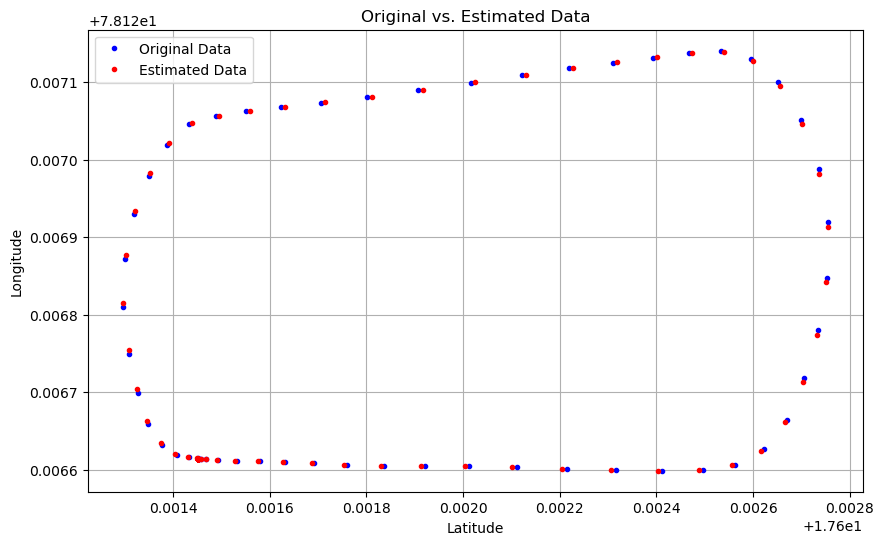

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, A, B, H, Q, R, initial_state, initial_covariance):
        self.A = A  # System dynamics matrix
        self.B = B  # Control input matrix
        self.H = H  # Measurement matrix
        self.Q = Q  # Process noise covariance matrix
        self.R = R  # Measurement noise covariance matrix

        self.state = initial_state  # Initial state estimate
        self.covariance = initial_covariance  # Initial covariance estimate

    def predict(self, control_input=None):
        # Predict the next state
        if control_input is not None:
            self.state = np.dot(self.A, self.state) + np.dot(self.B, control_input)
        else:
            self.state = np.dot(self.A, self.state)
        
        # Predict the next covariance
        self.covariance = np.dot(np.dot(self.A, self.covariance), self.A.T) + self.Q

    def update(self, measurement):
        # Kalman gain computation
        S = np.dot(np.dot(self.H, self.covariance), self.H.T) + self.R
        K = np.dot(np.dot(self.covariance, self.H.T), np.linalg.inv(S))

        # Update the state estimate
        innovation = measurement - np.dot(self.H, self.state)
        self.state = self.state + np.dot(K, innovation)

        # Update the covariance estimate
        self.covariance = np.dot((np.eye(self.covariance.shape[0]) - np.dot(K, self.H)), self.covariance)

# Read the ASCII file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()
         
# Initialize lists to store parsed data
latitudes = []
longitudes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extract latitude, longitude, and their standard deviations
    latitudes.append(float(fields[2]))
    longitudes.append(float(fields[3]))
    

# Define system matrices and initial conditions
A = np.eye(2)    #Identity matrix, assuming a simple motion model
B = np.zeros((2, 2))  #No control input
H = np.eye(2)   # Identity matrix as we directly observe position
Q = np.eye(2) * 0.01  #Process noise covariance
R = np.eye(2) * 0.001  # Measurement noise covariance
initial_state = np.array([latitudes[0], longitudes[0]])  # Initial position
initial_covariance = np.eye(2)  # Initial covariance matrix

# Create Kalman filter object
kf = KalmanFilter(A, B, H, Q, R, initial_state, initial_covariance)

# Lists to store original and estimated data
original_latitudes = []
original_longitudes = []
estimated_latitudes = []
estimated_longitudes = []

# Perform filtering for each measurement
for latitude, longitude in zip(latitudes, longitudes):
    measurement = np.array([latitude, longitude])
    kf.predict()
    kf.update(measurement)
    
    # Append original and estimated data
    original_latitudes.append(latitude)
    original_longitudes.append(longitude)
    estimated_latitudes.append(kf.state[0])
    estimated_longitudes.append(kf.state[1])
    
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(original_latitudes,original_longitudes,  'b.', label='Original Data', color='blue')
plt.plot( estimated_latitudes,estimated_longitudes,'r.',label='Estimated Data', color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()


## (Final)Error calculation(lat long is first converted into meters and then perform calculations)

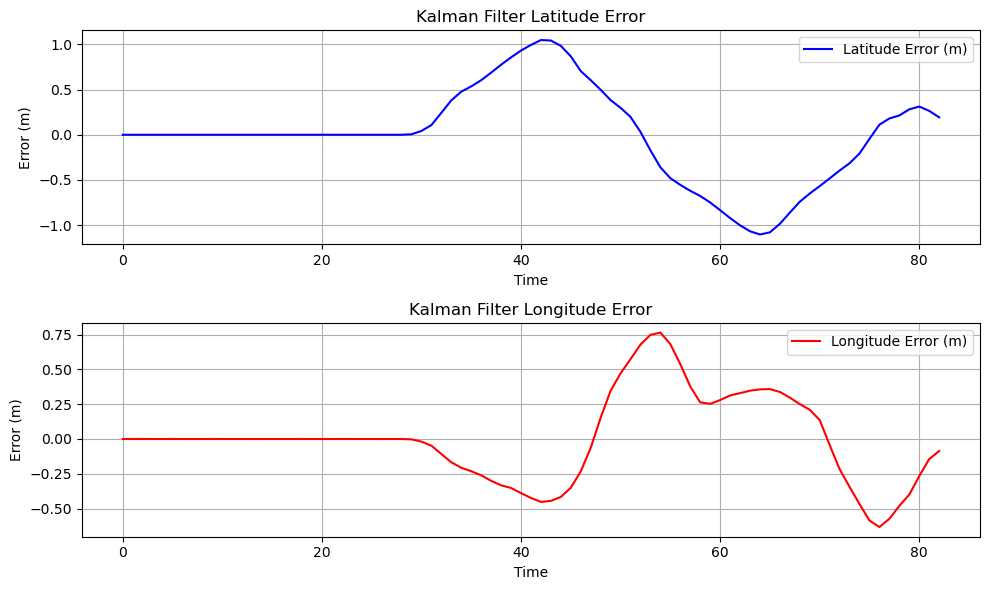

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Function to convert latitude and longitude to meters
def lat_lon_to_meters(lat, lon):
    # Approximate conversion factors for latitude and longitude (for small differences)
    lat_to_m = 111320  # Approximately 111 km per degree latitude
    lon_to_m = 111320  # Approximately 111 km per degree longitude at the equator
    if np.isscalar(lat):
        lat_meters = lat * lat_to_m
    else:
        lat_meters = np.array(lat) * lat_to_m
    if np.isscalar(lon):
        lon_meters = lon * lon_to_m * np.cos(np.radians(lat))
    else:
        lon_meters = np.array(lon) * lon_to_m * np.cos(np.radians(lat))
    return lat_meters, lon_meters
    
# Function to calculate error in meters
def calculate_error(original, estimated):
    return np.array(original) - np.array(estimated)

class KalmanFilter:
    def __init__(self, A, B, H, Q, R, initial_state, initial_covariance):
        self.A = A  # System dynamics matrix
        self.B = B  # Control input matrix
        self.H = H  # Measurement matrix
        self.Q = Q  # Process noise covariance matrix
        self.R = R  # Measurement noise covariance matrix

        self.state = initial_state  # Initial state estimate
        self.covariance = initial_covariance  # Initial covariance estimate

    def predict(self, control_input=None):
        # Predict the next state
        if control_input is not None:
            self.state = np.dot(self.A, self.state) + np.dot(self.B, control_input)
        else:
            self.state = np.dot(self.A, self.state)
        
        # Predict the next covariance
        self.covariance = np.dot(np.dot(self.A, self.covariance), self.A.T) + self.Q

    def update(self, measurement):
        # Kalman gain computation
        S = np.dot(np.dot(self.H, self.covariance), self.H.T) + self.R
        K = np.dot(np.dot(self.covariance, self.H.T), np.linalg.inv(S))

        # Update the state estimate
        innovation = measurement - np.dot(self.H, self.state)
        self.state = self.state + np.dot(K, innovation)

        # Update the covariance estimate
        self.covariance = np.dot((np.eye(self.covariance.shape[0]) - np.dot(K, self.H)), self.covariance)

# Read the ASCII file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()
         
# Initialize lists to store parsed data
latitudes = []
longitudes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extract latitude and longitude
    lat = float(fields[2])
    lon = float(fields[3])
    
    # Append to lists
    latitudes.append(lat)
    longitudes.append(lon)

# Define system matrices and initial conditions
A = np.eye(2)  # Identity matrix, assuming a simple motion model
B = np.zeros((2, 2))  # No control input
H = np.eye(2)  # Identity matrix as we directly observe position
Q = np.eye(2) * 0.01  # Process noise covariance
R = np.eye(2) * 0.001  # Measurement noise covariance
initial_state = np.array([latitudes[0], longitudes[0]])  # Initial position
initial_covariance = np.eye(2)  # Initial covariance matrix

# Create Kalman filter object
kf = KalmanFilter(A, B, H, Q, R, initial_state, initial_covariance)

# Lists to store estimated data
estimated_latitudes = []
estimated_longitudes = []

# Perform filtering for each measurement
for latitude, longitude in zip(latitudes, longitudes):
    measurement = np.array([latitude, longitude])
    kf.predict()
    kf.update(measurement)
    
    # Append estimated data
    estimated_latitudes.append(kf.state[0])
    estimated_longitudes.append(kf.state[1])

# Convert original and estimated coordinates to meters
original_latitudes_meters, original_longitudes_meters = lat_lon_to_meters(latitudes, longitudes)
estimated_latitudes_meters, estimated_longitudes_meters = lat_lon_to_meters(estimated_latitudes, estimated_longitudes)

# Calculate error in meters
lat_error = calculate_error(original_latitudes_meters, estimated_latitudes_meters)
lon_error = calculate_error(original_longitudes_meters, estimated_longitudes_meters)
# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(lat_error, label='Latitude Error (m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Kalman Filter Latitude Error')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(lon_error, label='Longitude Error (m)', color='red')
plt.xlabel('Time')
plt.ylabel('Error (m)')
plt.title('Kalman Filter Longitude Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Metrics calculation

/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_11826/4235945889.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(original_latitudes, original_longitudes, 'b.', label='Original Data', color='blue')
/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_11826/4235945889.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(estimated_latitudes, estimated_longitudes, 'r.', label='Estimated Data', color='red')


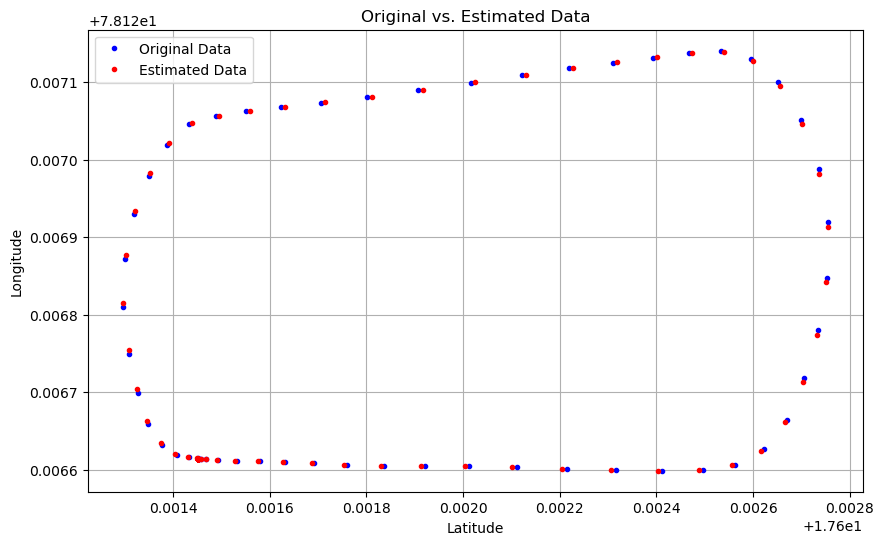


Latitude Results:
RMSE: 4.634851526743886e-06
MAE: 3.21456606297532e-06
R-squared: 0.9999046697169197
Percentage Error: 1.8262480121997632e-05

Longitude Results:
RMSE: 2.2834873224525907e-06
MAE: 1.1925334671030828e-06
R-squared: 0.9998696804899506
Percentage Error: 1.5264062152872188e-06


In [5]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, A, B, H, Q, R, initial_state, initial_covariance):
        self.A = A  # System dynamics matrix
        self.B = B  # Control input matrix
        self.H = H  # Measurement matrix
        self.Q = Q  # Process noise covariance matrix
        self.R = R  # Measurement noise covariance matrix

        self.state = initial_state  # Initial state estimate
        self.covariance = initial_covariance  # Initial covariance estimate

    def predict(self, control_input=None):
        # Predict the next state
        if control_input is not None:
            self.state = np.dot(self.A, self.state) + np.dot(self.B, control_input)
        else:
            self.state = np.dot(self.A, self.state)
        
        # Predict the next covariance
        self.covariance = np.dot(np.dot(self.A, self.covariance), self.A.T) + self.Q

    def update(self, measurement):
        # Kalman gain computation
        S = np.dot(np.dot(self.H, self.covariance), self.H.T) + self.R
        K = np.dot(np.dot(self.covariance, self.H.T), np.linalg.inv(S))

        # Update the state estimate
        innovation = measurement - np.dot(self.H, self.state)
        self.state = self.state + np.dot(K, innovation)

        # Update the covariance estimate
        self.covariance = np.dot((np.eye(self.covariance.shape[0]) - np.dot(K, self.H)), self.covariance)

# Read the ASCII file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()
         
# Initialize lists to store parsed data
latitudes = []
longitudes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extract latitude, longitude, and their standard deviations
    latitudes.append(float(fields[2]))
    longitudes.append(float(fields[3]))

# Define system matrices and initial conditions
A = np.eye(2)  # Identity matrix, assuming a simple motion model
B = np.zeros((2, 2))  # No control input
H = np.eye(2)  # Identity matrix as we directly observe position
Q = np.eye(2) * 0.01  # Process noise covariance
R = np.eye(2) * 0.001  # Measurement noise covariance
initial_state = np.array([latitudes[0], longitudes[0]])  # Initial position
initial_covariance = np.eye(2)  # Initial covariance matrix

# Create Kalman filter object
kf = KalmanFilter(A, B, H, Q, R, initial_state, initial_covariance)

# Lists to store original and estimated data
original_latitudes = []
original_longitudes = []
estimated_latitudes = []
estimated_longitudes = []

# Perform filtering for each measurement
for latitude, longitude in zip(latitudes, longitudes):
    measurement = np.array([latitude, longitude])
    kf.predict()
    kf.update(measurement)
        
    # Append original and estimated data
    original_latitudes.append(latitude)
    original_longitudes.append(longitude)
    estimated_latitudes.append(kf.state[0])
    estimated_longitudes.append(kf.state[1])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(original_latitudes, original_longitudes, 'b.', label='Original Data', color='blue')
plt.plot(estimated_latitudes, estimated_longitudes, 'r.', label='Estimated Data', color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation metrics
def calculate_rmse(original, estimated):
    return np.sqrt(np.mean((original - estimated) ** 2))

def calculate_mae(original, estimated):
    return np.mean(np.abs(original - estimated))

def calculate_r_squared(original, estimated):
    mean_original = np.mean(original)
    ss_total = np.sum((original - mean_original) ** 2)
    ss_res = np.sum((original - estimated) ** 2)
    return 1 - (ss_res / ss_total)

def calculate_percentage_error(original, estimated):
    return np.mean(np.abs((estimated - original) / original)) * 100

# Convert to numpy arrays for easy calculation
original_latitudes = np.array(original_latitudes)
original_longitudes = np.array(original_longitudes)
estimated_latitudes = np.array(estimated_latitudes)
estimated_longitudes = np.array(estimated_longitudes)

# Calculate evaluation metrics
rmse_lat = calculate_rmse(original_latitudes, estimated_latitudes)
rmse_lon = calculate_rmse(original_longitudes, estimated_longitudes)

mae_lat = calculate_mae(original_latitudes, estimated_latitudes)
mae_lon = calculate_mae(original_longitudes, estimated_longitudes)

r_squared_lat = calculate_r_squared(original_latitudes, estimated_latitudes)
r_squared_lon = calculate_r_squared(original_longitudes, estimated_longitudes)

percentage_error_lat = calculate_percentage_error(original_latitudes, estimated_latitudes)
percentage_error_lon = calculate_percentage_error(original_longitudes, estimated_longitudes)

# Print the results
print("\nLatitude Results:")
print("RMSE:", rmse_lat)
print("MAE:", mae_lat)
print("R-squared:", r_squared_lat)
print("Percentage Error:", percentage_error_lat)

print("\nLongitude Results:")
print("RMSE:", rmse_lon)
print("MAE:", mae_lon)
print("R-squared:", r_squared_lon)
print("Percentage Error:", percentage_error_lon)


## Extended kalman filter

/var/folders/lk/qt3zp1vs2b15lty189sx1bq00000gn/T/ipykernel_3051/3972039576.py:101: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(estimated_latitudes, estimated_longitudes,'r.', label='Estimated Data', color='red')


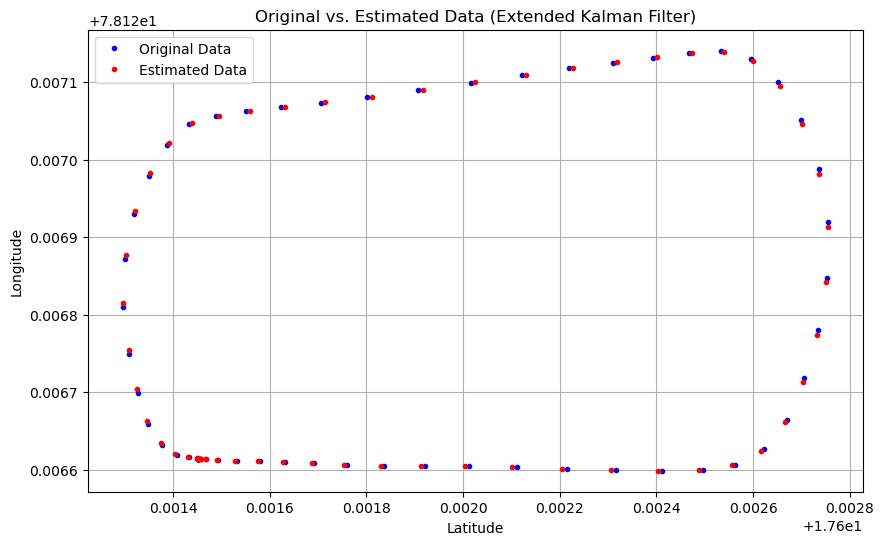

In [17]:
import numpy as np

class ExtendedKalmanFilter:
    def __init__(self, initial_state, initial_covariance, process_noise_covariance, measurement_noise_covariance):
        self.state = initial_state
        self.covariance = initial_covariance
        self.Q = process_noise_covariance
        self.R = measurement_noise_covariance

    def predict(self, g, A, u):
        # Prediction step for the state and covariance
        self.state = g(self.state, u)
        self.covariance = np.dot(np.dot(A(self.state, u), self.covariance), A(self.state, u).T) + self.Q

    def update(self, measurement, h, H):
        # Kalman gain computation
        S = np.dot(np.dot(H(self.state), self.covariance), H(self.state).T) + self.R
        K = np.dot(np.dot(self.covariance, H(self.state).T), np.linalg.inv(S))

        # Update the state estimate
        innovation = measurement - h(self.state)
        self.state = self.state + np.dot(K, innovation)

        # Update the covariance estimate
        self.covariance = np.dot((np.eye(self.covariance.shape[0]) - np.dot(K, H(self.state))), self.covariance)

# Read the ASCII file
file_path = "/Users/ravitejakunchanapalli/Downloads/org_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')

    # Split the fields into individual data points
    fields = fields.split(',')

    # Extract latitude, longitude, and their standard deviations
    latitudes.append(float(fields[2]))
    longitudes.append(float(fields[3]))

# Define functions for the nonlinear model equations
def state_propagation(state, control_input):
    # Nonlinear state propagation function
    # Example: Assuming simple linear motion model
    return state  # No change as it's a simple motion model

def state_jacobian(state, control_input):
    # Jacobian of the state propagation function
    # Example: Jacobian of a simple motion model (identity matrix)
    return np.eye(len(state))

def measurement_model(state):
    # Nonlinear measurement model function
    # Example: Identity measurement model
    return state

def measurement_jacobian(state):
    # Jacobian of the measurement model function
    # Example: Jacobian of identity measurement model (identity matrix)
    return np.eye(len(state))

# Define initial conditions and noise covariances
initial_state = np.array([latitudes[0], longitudes[0]])
initial_covariance = np.eye(2)
process_noise_covariance = np.eye(2) * 0.01  # Example process noise covariance
measurement_noise_covariance = np.eye(2) * 0.001  # Example measurement noise covariance

# Create Extended Kalman Filter object
ekf = ExtendedKalmanFilter(initial_state, initial_covariance, process_noise_covariance, measurement_noise_covariance)

# Lists to store estimated data
estimated_latitudes = []
estimated_longitudes = []

# Perform filtering for each measurement
for latitude, longitude in zip(latitudes, longitudes):
    measurement = np.array([latitude, longitude])
    
    # Predict step
    ekf.predict(state_propagation, state_jacobian, None)  # No control input in this example
    
    # Update step
    ekf.update(measurement, measurement_model, measurement_jacobian)

    # Store estimated latitude and longitude
    estimated_latitudes.append(ekf.state[0])
    estimated_longitudes.append(ekf.state[1])

# Plotting (similar to the previous example)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(latitudes, longitudes, 'b.',label='Original Data')
plt.plot(estimated_latitudes, estimated_longitudes,'r.', label='Estimated Data', color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original vs. Estimated Data (Extended Kalman Filter)')
plt.legend()
plt.grid(True)
plt.show()
